In [16]:
import matplotlib
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import confusion_matrix



In [17]:
cols = ['ID', 'Diagnosis', 'radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness', 'concavity', 'concave_points', 'symmetry', 'fractal_dimension',
        'radius_SE', 'texture_SE', 'perimeter_SE', 'area_SE', 'smoothness_SE', 'compactness_SE', 'concavity_SE', 'concave_points_SE', 'symmetry_SE', 'fractal_dimension_SE',
        'radius_MAX', 'texture_MAX', 'perimeter_MAX', 'area_MAX', 'smoothness_MAX', 'compactness_MAX', 'concavity_MAX', 'concave_points_MAX', 'symmetry_MAX', 'fractal_dimension_MAX']
df = pd.read_csv('../../../Wisconsin_Database/wdbc.data', header=None)
df.columns = cols
df['Diagnosis'] = df['Diagnosis'].map(
                   {'M':True,'B':False})
print(df.shape)

(569, 32)


In [18]:
X = df[cols[2:]]
y = df[cols[1]]

SEED = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90, random_state=SEED)
print('X_train: {}, X_test: {}'.format(str(X_train.shape), str(X_test.shape)))
print('Y_train: {}, Y_test: {}'.format(str(y_train.shape), str(y_test.shape)))
scaler = StandardScaler()
scaler.fit(X_train)
# Scale both X_train and X_test
#X_train = scaler.transform(X_train)
#X_test = scaler.transform(X_test)

col_names=df.columns[2:]
scaled_df = pd.DataFrame(X_train, columns=col_names)
#scaled_df.describe().T

X_train: (56, 30), X_test: (513, 30)
Y_train: (56,), Y_test: (513,)


In [19]:
print(y_train)

389     True
1       True
529    False
80     False
205     True
34      True
508    False
427    False
454    False
366     True
91      True
339     True
345    False
241    False
13      True
315    False
387    False
273    False
166    False
563     True
484    False
554    False
504    False
243    False
189    False
475    False
510    False
58     False
474    False
252     True
21     False
313    False
459    False
160    False
276    False
191    False
385     True
413    False
491    False
343     True
308    False
130    False
99      True
372     True
87      True
458    False
330     True
214     True
466    False
121     True
20     False
71     False
106    False
270    False
435     True
102    False
Name: Diagnosis, dtype: bool


In [20]:
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


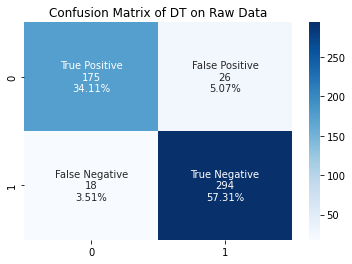

In [21]:
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

data = np.array([[tp, fp],[fn, tn]])
group_names = ['True Positive', 'False Positive', 'False Negative', 'True Negative']
group_counts = ["{0:0.0f}".format(value) for value in
                data.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     data.flatten()/np.sum(data)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)


labels = np.asarray(labels).reshape(2,2)
sn.heatmap(data, annot=labels, fmt='', cmap='Blues')
plt.title("Confusion Matrix of DT on Raw Data")
plt.show()


In [22]:
print(sum(y_test.values == y_pred))
print(len(y_pred))
print(sum(y_test.values == y_pred) / len(y_pred))


469
513
0.9142300194931774
